In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

btc = pd.read_parquet('../cache/btc.parquet')
btc_cleaned = pd.read_parquet('../cache/btc_cleaned.parquet')
btc_cleaned.head()

,Timestamp,Open_pct_change
0,1546300800,-0.226363
1,1546301700,-2.578560
2,1546302600,-1.509301
3,1546303500,0.781614
4,1546304400,-0.291943


In [2]:
btc_cleaned[btc_cleaned.isna().any(axis=1)]

,Timestamp,Open_pct_change


In [4]:
# all the rows with NaN values
btc_cleaned[btc_cleaned.isna().any(axis=1)]


,Timestamp,Open_pct_change
Datetime,,
2019-11-03 06:00:00,NaN,NaN
2019-11-03 06:15:00,NaN,NaN
2019-11-03 06:30:00,NaN,NaN
2019-11-03 06:45:00,NaN,NaN
2020-11-01 06:00:00,NaN,NaN
2020-11-01 06:15:00,NaN,NaN
2020-11-01 06:30:00,NaN,NaN
2020-11-01 06:45:00,NaN,NaN
2021-11-07 06:00:00,NaN,NaN


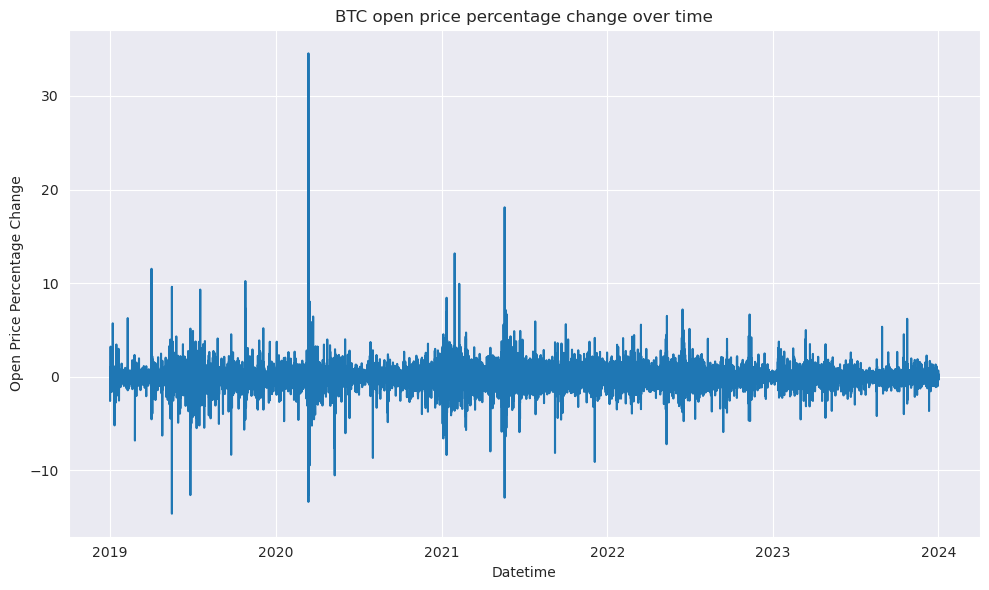

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Datetime', y='Open_pct_change', data=btc_cleaned)
plt.title('BTC open price percentage change over time')
plt.tight_layout()
plt.xlabel('Datetime')
plt.ylabel('Open Price Percentage Change')
plt.show()


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(btc_cleaned['Open_pct_change'], model='additive')
decomposition.plot()
plt.show()


ValueError: This function does not handle missing values